# This notebook uses the merged data to demonstrate our findings
### Objective: Find hypothesis test, fitting models and Visualizations

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr

In [3]:
merged = pd.read_csv("merged.csv")
display(merged)

,Attrition,job_dissatisfied_2018,job_satisfied_2018,female_2018,male_2018,married_2018,single_2018,overtime_2018,individual income_2018,job_dissatisfied_2022,job_satisfied_2022,female_2022,male_2022,married_2022,single_2022,overtime_2022,individual income_2022
0,Yes/Count,462.0,4266,4307,421.00,3548,1180.00,1531,"70,285",94.00,105.00,86.00,113.00,61.00,114.00,139.00,48290.95
1,Yes/%,0.1,0.9023,0.9109999999999999,0.09,0.7504000000000001,0.25,0.32380000000000003,"41,404",0.47,0.53,0.43,0.57,0.31,0.57,0.70,32892.00
2,No/Count,3867.0,"35,342","35,847",3362.00,"29,490",9719.00,"12,056","85,444",545.00,932.00,592.00,885.00,716.00,408.00,337.00,82227.62
3,No/%,0.1,0.9014,0.9143000000000001,0.09,0.7521,0.25,0.3075,"37,157",0.37,0.63,0.40,0.60,0.48,0.28,0.23,62448.00


In [4]:
import pandas as pd

# List of columns to convert to float, excluding 'Attrition'
columns_to_convert = [
    "job_satisfied_2018", "female_2018", "married_2018", "single_2018", 
    "overtime_2018", "individual income_2018", "job_dissatisfied_2022", 
    "job_satisfied_2022", "female_2022", "male_2022", "married_2022", 
    "single_2022", "overtime_2022", "individual income_2022"
]

# Convert columns to numeric, handling commas and excluding 'Attrition'
for column in columns_to_convert:
    # Remove commas and convert to float
    merged[column] = pd.to_numeric(merged[column].replace({',': ''}, regex=True), errors='coerce')

# Verify the result
print(merged.dtypes)

display(merged)

Attrition                  object
job_dissatisfied_2018     float64
job_satisfied_2018        float64
female_2018               float64
male_2018                 float64
married_2018              float64
single_2018               float64
overtime_2018             float64
individual income_2018      int64
job_dissatisfied_2022     float64
job_satisfied_2022        float64
female_2022               float64
male_2022                 float64
married_2022              float64
single_2022               float64
overtime_2022             float64
individual income_2022    float64
dtype: object


,Attrition,job_dissatisfied_2018,job_satisfied_2018,female_2018,male_2018,married_2018,single_2018,overtime_2018,individual income_2018,job_dissatisfied_2022,job_satisfied_2022,female_2022,male_2022,married_2022,single_2022,overtime_2022,individual income_2022
0,Yes/Count,462.0,4266.0000,4307.0000,421.00,3548.0000,1180.00,1531.0000,70285,94.00,105.00,86.00,113.00,61.00,114.00,139.00,48290.95
1,Yes/%,0.1,0.9023,0.9110,0.09,0.7504,0.25,0.3238,41404,0.47,0.53,0.43,0.57,0.31,0.57,0.70,32892.00
2,No/Count,3867.0,35342.0000,35847.0000,3362.00,29490.0000,9719.00,12056.0000,85444,545.00,932.00,592.00,885.00,716.00,408.00,337.00,82227.62
3,No/%,0.1,0.9014,0.9143,0.09,0.7521,0.25,0.3075,37157,0.37,0.63,0.40,0.60,0.48,0.28,0.23,62448.00


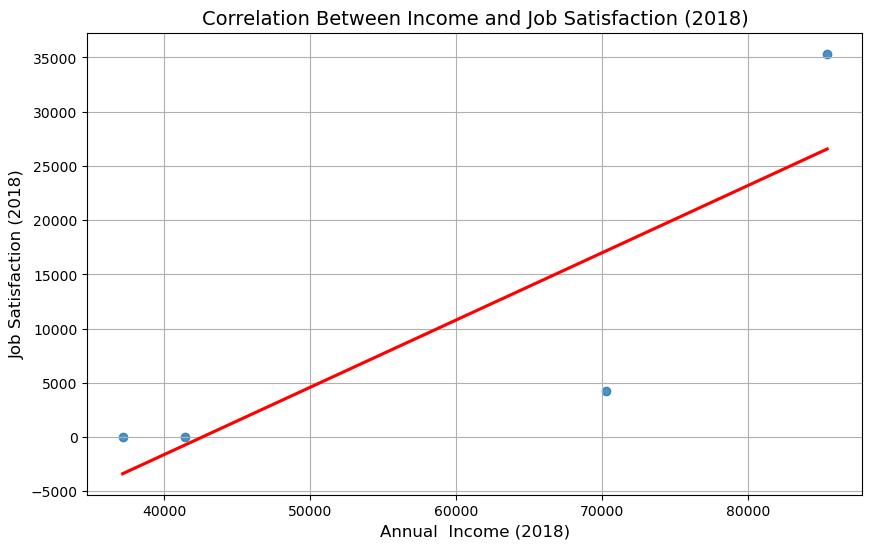

In [34]:
# Function to visualize correlation between income and job satisfaction
def visualize_income_vs_satisfaction(data, income_column, satisfaction_column, year):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=data[income_column], y=data[satisfaction_column], ci=None, line_kws={"color": "red"})
    plt.title(f"Correlation Between Income and Job Satisfaction ({year})", fontsize=14)
    plt.xlabel(f"Annual  Income ({year})", fontsize=12)
    plt.ylabel(f"Job Satisfaction ({year})", fontsize=12)
    plt.grid(True)
    plt.savefig('Correlation Between Income and Job Satisfaction 2018.png')
    plt.show()

# Example usage for 2022 data
visualize_income_vs_satisfaction(
    data=merged,
    income_column="individual income_2018",
    satisfaction_column="job_satisfied_2018",
    year=2018
)


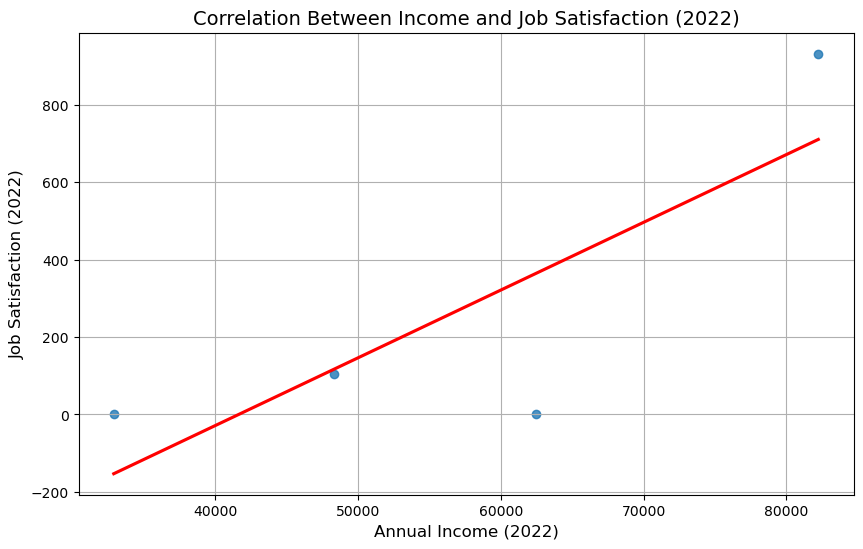

In [32]:
# Function to visualize correlation between income and job satisfaction
def visualize_income_vs_satisfaction(data, income_column, satisfaction_column, year):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=data[income_column], y=data[satisfaction_column], ci=None, line_kws={"color": "red"})
    plt.title(f"Correlation Between Income and Job Satisfaction ({year})", fontsize=14)
    plt.xlabel(f"Annual Income ({year})", fontsize=12)
    plt.ylabel(f"Job Satisfaction ({year})", fontsize=12)
    plt.grid(True)
    # Save the plot as a png
    plt.savefig('Correlation Between Income and Job Satisfaction 2022.png')
    plt.show()

# Example usage for 2022 data
visualize_income_vs_satisfaction(
    data=merged,
    income_column="individual income_2022",
    satisfaction_column="job_satisfied_2022",
    year=2022
)


## Looking at both line charts to see the correlation between job satisfaction and income for both years 2018 and 2022, there is a strong positive relationship between the 2. 
## Comparing both, the correlation is a lot stronger and clearer in 2018. We should now examine the p value and correlation using Pearson


#### For 2018

In [9]:
# Step 1: Calculate the Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(merged['individual income_2018'], merged['job_satisfied_2018'])

# Step 2: Print the Pearson correlation coefficient and p-value
print(f"Pearson Correlation Coefficient: {corr_coeff:.4f}")
print(f"P-Value: {p_value:.4f}")

# Step 3: Interpretation of the result
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is NOT statistically significant.")

Pearson Correlation Coefficient: 0.8415
P-Value: 0.1585
The correlation is NOT statistically significant.


#### For 2022

In [8]:
# Step 1: Calculate the Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(merged['individual income_2022'], merged['job_satisfied_2022'])

# Step 2: Print the Pearson correlation coefficient and p-value
print(f"Pearson Correlation Coefficient: {corr_coeff:.4f}")
print(f"P-Value: {p_value:.4f}")

# Step 3: Interpretation of the result
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is NOT statistically significant.")

Pearson Correlation Coefficient: 0.8149
P-Value: 0.1851
The correlation is NOT statistically significant.


## There is high correlation but the p values suggest that both years are not statisitcally significant

## We would like to note that the correlation was stronger in 2018 compared to 2022.

<br>

### In order to create boxplots, we had to melt the dataframe to fit our needs for this visualization

In [13]:
# Melting the DataFrame to long format
merged_long = pd.melt(merged, value_vars=['overtime_2018', 'overtime_2022'], 
                      var_name='year', value_name='overtime')

# Extract the year from the column name (this will give '2018' or '2022')
merged_long['year'] = merged_long['year'].apply(lambda x: x.split('_')[-1])

# Check the reshaped DataFrame
display(merged_long.head())


,year,overtime
0,2018,1531.0000
1,2018,0.3238
2,2018,12056.0000
3,2018,0.3075
4,2022,139.0000


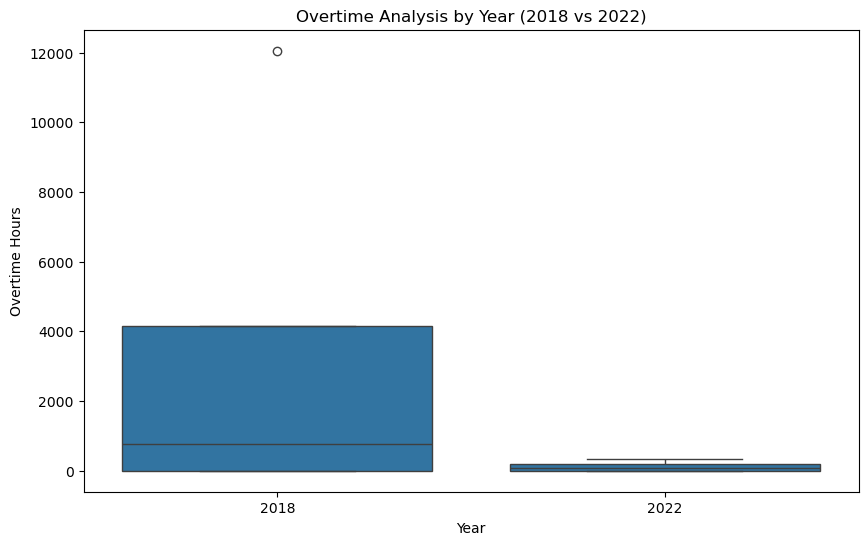

In [14]:
# Plotting overtime across years
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_long, x="year", y="overtime")
plt.title("Overtime Analysis by Year (2018 vs 2022)")
plt.xlabel("Year")
plt.ylabel("Overtime Hours")
plt.savefig('Overtime Analysis by Year (2018 vs 2022).png')
plt.show()


In [15]:
# Melting the DataFrame to long format
merged_long = pd.melt(merged, value_vars=['job_satisfied_2018', 'job_satisfied_2022'], 
                      var_name='year', value_name='job_satisfaction')

# Extract the year from the column name (this will give '2018' or '2022')
merged_long['year'] = merged_long['year'].apply(lambda x: x.split('_')[-1])

# Check the reshaped DataFrame
print(merged_long.head())


   year  job_satisfaction
0  2018         4266.0000
1  2018            0.9023
2  2018        35342.0000
3  2018            0.9014
4  2022          105.0000


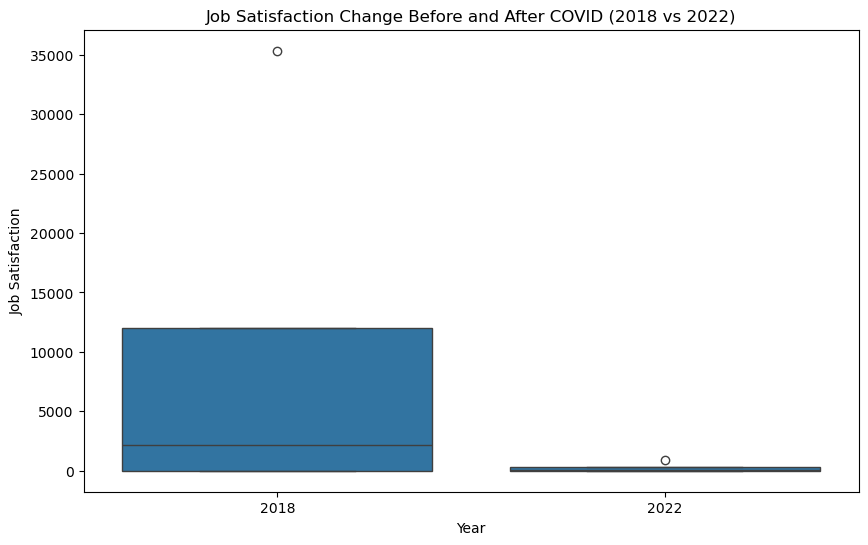

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting job satisfaction across years
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_long, x="year", y="job_satisfaction")
plt.title("Job Satisfaction Change Before and After COVID (2018 vs 2022)")
plt.xlabel("Year")
plt.ylabel("Job Satisfaction")
plt.savefig('Job Satisfaction Change Before and After COVID (2018 vs 2022).png')
plt.show()


## With the way our dataframe is, we focused on rows 0 and 2 as they were the counts rather than the percentages

## We have created a bar graph just to show how each overtime and individual income has changed between before and after covid

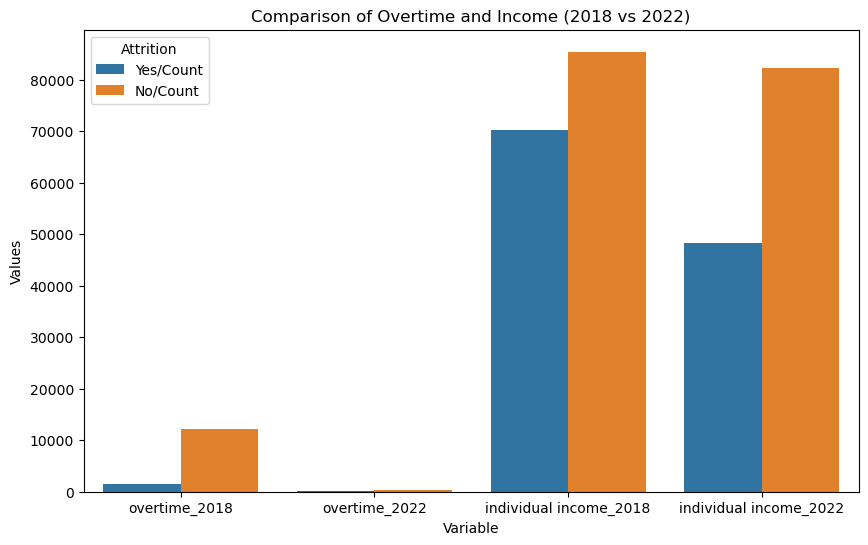

In [18]:

# Filter rows 0 and 2 from the 'merged' DataFrame
selected_rows = merged.iloc[[0, 2]]

# Reshape the data to long format for better plotting
selected_rows_long = pd.melt(selected_rows, 
                             id_vars=["Attrition"],  # Add other identifying columns if necessary
                             value_vars=["overtime_2018", "overtime_2022", "individual income_2018", "individual income_2022"], 
                             var_name="variable", 
                             value_name="value")

# Plotting the bar chart for the overtime and income comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="variable", y="value", hue="Attrition", data=selected_rows_long)

# Customizing the plot
plt.title("Comparison of Overtime and Income (2018 vs 2022)")
plt.xlabel("Variable")
plt.ylabel("Values")
plt.legend(title="Attrition", loc='upper left')

plt.savefig('Comparison of Overtime and Income (2018 vs 2022).png')
# Show the plot
plt.show()
